# Performance benchmark

MagmaPEC is a Python implementation of the algorithm also ued by Petrolog3. Compared to Petrolog, MagmaPEC has

  * a more up-to-date selection of melt Fe3/Fe2, ol-melt Fe-Mg Kd and melt thermometers and allows for PEC corrections
  * the option to perform PEC corrections at any pressure
  * the option to predict melt inclusion inition FeO from melt compositions.

Additionally, MagmaPEC is open-source and users can extend it with their own models. As a performance baseline, we compare MagmaPandas results with those from Petrolog3. Petrolog and MagmaPandas have not implemented equivalent models for all parameters, but we settings are kept as similar as possible. In Petrolog we use:



| Property      | Value                     |
|---------------|---------------------------|
| Kd            | Toplis et al. (2005)      |
| fO2           | QFM+1                     |
| melt Fe3Fe2   | Kress & Carmichael (1988) |
| pressure      | 1 bar.                    |
| olivine       | Putirka (2005, C-D)       |
| FeO initial.  | 10.9 wt.%                 |

Note that 1 bar is the only pressure available in petrolog. MagmaPEC settings are shown in the cells below.


In [1]:
import MagmaPEC as mpc
import MagmaPandas as mp

import pandas as pd
import matplotlib.pyplot as plt
import geoplot as gp

mm = 1/25.4

In [2]:
mpc.model_configuration.Kd_model = "toplis2005"
mpc.model_configuration.Fe3Fe2_model = "kress_carmichael1991"
mpc.model_configuration.melt_thermometer = "putirka2008_15"
mpc.model_configuration.fO2buffer = "QFM"
mpc.model_configuration.dfO2 = 1

print(mpc.model_configuration)


################## MagmaPandas ###################
##################################################
General settings__________________________________
fO2 buffer.....................................QFM
ΔfO2.............................................1
Melt Fe3+/Fe2+................kress_carmichael1991
Kd Fe-Mg ol-melt........................toplis2005
Melt thermometer....................putirka2008_15
Volatile solubility model.......iaconomarziano2012
Volatile species.............................mixed
##################################################



Import all input files

In [3]:
petrolog_file = "./data/petrolog/petrolog_output.csv"
input_melt_file = "./data/petrolog/petrolog_melt_input.csv"
input_olivine_file = "./data/petrolog/petrolog_olivine_input.csv"

In [4]:
petrolog = pd.read_csv(petrolog_file, index_col="SAMP_NO").query("number == 3")
petrolog.index.name = "name"

melt = mp.Melt(pd.read_csv(input_melt_file, index_col=[0]), units="wt. %", datatype="oxide")
olivine = mp.Olivine(pd.read_csv(input_olivine_file, index_col=[0]), units="wt. %", datatype="oxide")

Run MagmaPEC corrections at 1 bar and a fixed FeO(initial) of 10.9 wt.%

In [5]:
P_bar = 1
FeOi = 10.9

pec_model = mpc.PEC(inclusions=melt, olivines=olivine, P_bar=P_bar, FeO_target=FeOi)
melts_corrected, pec, checks = pec_model.correct()

Equilibrating ... |██████████████████████████████| 100% [172/172] in 24.8s 
Correcting    ... |██████████████████████████████| 100% [172/172] in 1:11.1 


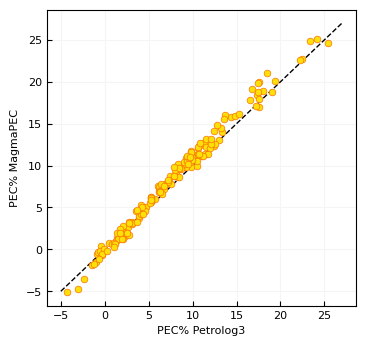

In [ ]:
gp.layout(colors=gp.colors.bright)
limits = (-5, 27)

fig, ax = plt.subplots(figsize=(90*mm, 85*mm))

ax.plot(limits, limits, "--", c="k")
ax.plot(- petrolog.loc[pec.index, "OL_PER"], pec["total_crystallisation"], "o")

ax.set_xlabel("PEC% Petrolog3")
ax.set_ylabel("PEC% MagmaPEC")

plt.show()

With these similar settings results plot very close to the 1:1 line.